In [100]:
#!/usr/bin/env python3

import numpy as np
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
#import scikit-learn


In [45]:
rawdata = pd.read_csv("party_in_nyc.csv")
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225414 entries, 0 to 225413
Data columns (total 8 columns):
Created Date     225414 non-null object
Closed Date      224619 non-null object
Location Type    225414 non-null object
Incident Zip     224424 non-null float64
City             224424 non-null object
Borough          225414 non-null object
Latitude         223946 non-null float64
Longitude        223946 non-null float64
dtypes: float64(3), object(5)
memory usage: 13.8+ MB


In [117]:
def split(data,train_ratio=0.7):
    n = len(data)
    index_list = np.random.permutation(n)
    train_size = int(train_ratio*n)
    test_indices = index_list[:train_size]
    train_indices = index_list[train_size:]
    return(data.iloc[test_indices],data.iloc[train_indices])

In [119]:
test,train = split(rawdata,0.7)

In [46]:
rawdata["Closed Date"] = pd.to_datetime(rawdata["Closed Date"])
rawdata["Created Date"] = pd.to_datetime(rawdata["Created Date"])

In [56]:
rawdata["Ticket Length"] = rawdata["Closed Date"] - rawdata["Created Date"]

In [27]:
rawdata["Ticket Length"].min()

Timedelta('-42440 days +01:03:51')

In [48]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225414 entries, 0 to 225413
Data columns (total 9 columns):
Created Date     225414 non-null datetime64[ns]
Closed Date      224619 non-null datetime64[ns]
Location Type    225414 non-null object
Incident Zip     224424 non-null float64
City             224424 non-null object
Borough          225414 non-null object
Latitude         223946 non-null float64
Longitude        223946 non-null float64
Ticket Length    224619 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(3), object(3), timedelta64[ns](1)
memory usage: 15.5+ MB


In [31]:
#rawdata[rawdata["Ticket Length"] == rawdata["Ticket Length"].min()]

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude,Ticket Length
28866,2016-03-12 22:56:09,1900-01-01,Residential Building/House,NaN,NaN,Unspecified,NaN,NaN,-42440 days +01:03:51


In [49]:
rawdata = rawdata.dropna(how='any')

In [57]:
rawdata["Ticket Length"].max()

Timedelta('34 days 19:42:33')

In [58]:
rawdata["Ticket Length"].min()

Timedelta('0 days 00:02:24')

In [50]:
rawdata["Ticket Length"] = pd.to_datetime(rawdata["Ticket Length"])

In [62]:
rawdata["Ticket Length Num"] = [i.total_seconds() for i in rawdata["Ticket Length"]]

In [65]:
rawdata["Ticket Length Scaled"] = rawdata["Ticket Length Num"]/rawdata["Ticket Length Num"].max()

In [86]:
rawdata["Ticket Length Color"] = (rawdata["Ticket Length Scaled"].sqrt())*100

AttributeError: 'Series' object has no attribute 'sqrt'

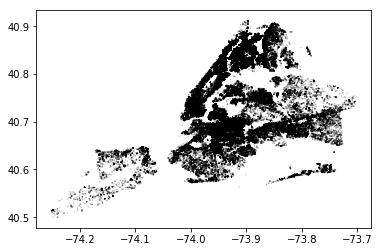

In [90]:
plt.scatter(rawdata["Longitude"],rawdata["Latitude"],c=rawdata["Ticket Length Scaled"],s=0.01,cmap="gray")
plt.show()

In [71]:
from ggplot import *

ggplot(aes(x="Longitude",y="Latitude",color="Ticket Length Num"),data=rawdata) + geom_point()

ModuleNotFoundError: No module named 'ggplot'